In [1]:
folder = 'Z:/Daisy/2022/sv40_ribonums/359f'

mrna_file = 'Z:/Daisy/2022/sv40_ribonums/359f/mrna/suntag.loc3'
bright_file = 'Z:/Daisy/2022/sv40_ribonums/359f/brights/neongreen.loc3'
single_file = 'Z:/Daisy/2022/sv40_ribonums/359f/singles/neongreen.loc3'

import pandas as pd
import scipy.spatial.distance
import scipy.optimize
import numpy as np
import matplotlib.pyplot as plt


In [2]:
xy_pixel = 0.0142
z_pixel = 0.2

In [3]:
mrna = pd.read_csv(mrna_file, sep = '  ', engine = 'python', names = ['x', 'y', 'z', 'intensity', ''])
brights = pd.read_csv(bright_file, sep = '  ', engine = 'python', names = ['x', 'y', 'z', 'intensity', ''])
singles = pd.read_csv(single_file, sep = '  ', engine = 'python', names = ['x', 'y', 'z', 'intensity', ''])
mrna = mrna.loc[mrna['intensity'] != -8]
brights = brights.loc[brights['intensity'] != -8]
singles = singles.loc[singles['intensity'] != -8]

In [4]:
mrna['x'] = mrna['x']*xy_pixel
mrna['y'] = mrna['y']*xy_pixel
mrna['z'] = mrna['z']*z_pixel
brights['x'] = brights['x']*xy_pixel
brights['y'] = brights['y']*xy_pixel
brights['z'] = brights['z']*z_pixel
singles['x'] = singles['x']*xy_pixel
singles['y'] = singles['y']*xy_pixel
singles['z'] = singles['z']*z_pixel

In [5]:
just_singles = singles[~singles.isin(brights)].dropna()

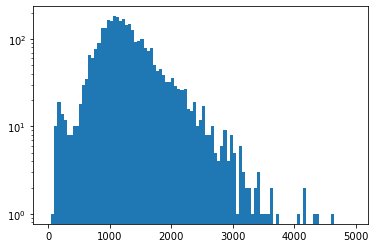

In [6]:
plt.hist(mrna['intensity'], bins = range(0,5000, 50))
plt.yscale('log')
plt.show()

In [7]:
mrna = mrna[(mrna['intensity'] < 10000) & (mrna['intensity'] > 200)]

(array([  0.,   0.,   0.,   0.,  14.,  12.,   8.,   8.,  10.,  10.,  18.,
         30.,  35.,  66.,  60.,  77.,  89., 133., 134., 165., 161., 182.,
        179., 162., 169., 145., 150., 128.,  92.,  94., 100.,  79.,  73.,
         79.,  51.,  43.,  45.,  39.,  32.,  32.,  36.,  29.,  27.,  26.,
         27.,  16.,  15.,  19.,  10.,  12.,  17.,   8.,   8.,  10.,   5.,
          4.,   6.,   9.,   4.]),
 array([   0,   50,  100,  150,  200,  250,  300,  350,  400,  450,  500,
         550,  600,  650,  700,  750,  800,  850,  900,  950, 1000, 1050,
        1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450, 1500, 1550, 1600,
        1650, 1700, 1750, 1800, 1850, 1900, 1950, 2000, 2050, 2100, 2150,
        2200, 2250, 2300, 2350, 2400, 2450, 2500, 2550, 2600, 2650, 2700,
        2750, 2800, 2850, 2900, 2950]),
 <BarContainer object of 59 artists>)

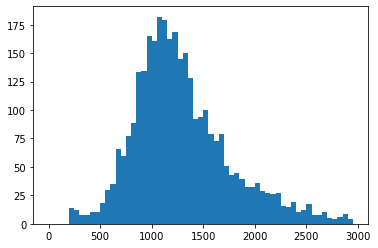

In [8]:
plt.hist(mrna['intensity'], bins = range(0,3000, 50))

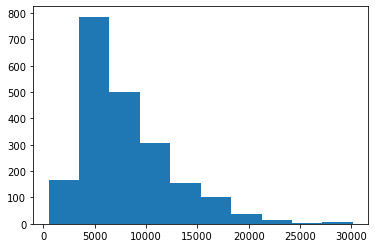

In [9]:
plt.hist(brights['intensity'])
#plt.yscale('log')
plt.show()

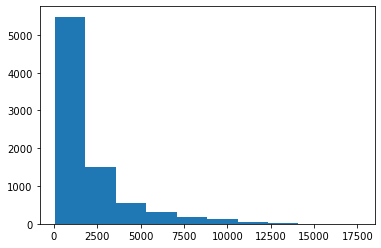

In [10]:
plt.hist(singles['intensity'])
#plt.yscale('log')
plt.show()

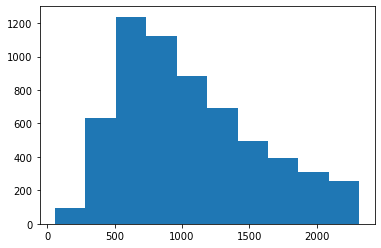

In [11]:
plt.hist(just_singles['intensity'])
#plt.yscale('log')
plt.show()

In [12]:
print('mrna: ' + str(mrna.shape))
print('brights: ' + str(brights.shape))
print('singles: ' + str(singles.shape))
print('just_singles: ' + str(just_singles.shape))

mrna: (3238, 5)
brights: (2076, 5)
singles: (8206, 5)
just_singles: (6130, 5)


In [13]:
mrna_pos = np.array(mrna[['x', 'y', 'z']])
singles_pos = np.array(singles[['x', 'y', 'z']])
brights_pos = np.array(brights[['x', 'y', 'z']])

In [14]:
singles_pos

array([[16.73074814,  4.46534932,  4.6229856 ],
       [ 6.76903279, 16.06351854,  8.1651012 ],
       [26.19100682,  3.46141117,  8.6696372 ],
       ...,
       [23.61784896, 29.04576346, 18.6568358 ],
       [25.15146316,  0.08832796,  0.65581908],
       [ 0.04364026, 11.59069348,  1.66987786]])

In [15]:
distances = scipy.spatial.distance.cdist(singles_pos, mrna_pos, metric = 'euclidean')
opt_index = scipy.optimize.linear_sum_assignment(distances)

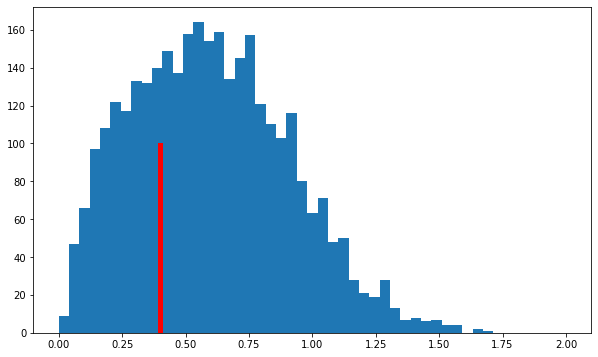

In [16]:
min_dist = []
for i in zip(opt_index[0], opt_index[1]):
    min_dist.append(distances[i])
plt.figure(figsize = (10, 6))
plt.hist(min_dist, np.linspace(0, 2, 50))
plt.bar(0.4, 100, color = 'red', width = 0.02)
plt.show()

In [17]:
for i in zip(opt_index[0], opt_index[1]):
    singles.loc[i[0], 'closest_mrna'] = i[1]
    mrna.loc[i[1], 'closest_ng'] = i[0]
    singles.loc[i[0], 'distance'] = distances[i]
    mrna.loc[i[1], 'distance'] = distances[i]

    

In [18]:
coloc = singles.loc[singles['distance'] <= 0.4]
non_coloc = singles[~singles.isin(coloc)].dropna(subset = ['x'])

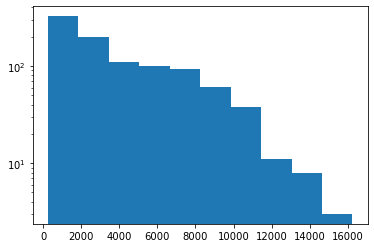

In [19]:
plt.hist(coloc['intensity'])
plt.yscale('log')
plt.show()

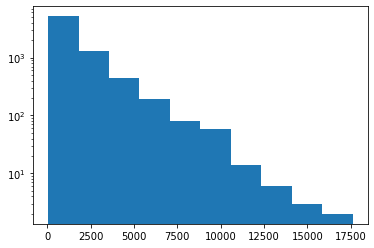

In [20]:
plt.hist(non_coloc['intensity'])
plt.yscale('log')
plt.show()

In [21]:
distances_bright = scipy.spatial.distance.cdist(brights_pos, mrna_pos, metric = 'euclidean')
opt_index_bright = scipy.optimize.linear_sum_assignment(distances_bright)

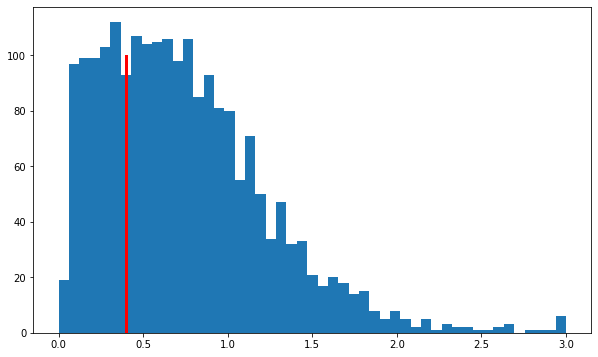

In [22]:
min_dist = []
for i in zip(opt_index_bright[0], opt_index_bright[1]):
    min_dist.append(distances_bright[i])
plt.figure(figsize = (10, 6))
plt.hist(min_dist, np.linspace(0, 3, 50))
plt.bar(0.4, 100, color = 'red', width = 0.02)
plt.show()

In [23]:
for i in zip(opt_index_bright[0], opt_index_bright[1]):
    brights.loc[i[0], 'closest_mrna'] = i[1]
    mrna.loc[i[1], 'closest_bright'] = i[0]
    brights.loc[i[0], 'distance'] = distances_bright[i]
    mrna.loc[i[1], 'distance_to_bright'] = distances_bright[i]

In [24]:
bright_coloc = brights.loc[brights['distance'] <= 0.4]
bright_no_coloc = brights[~brights.isin(bright_coloc)].dropna(subset = ['x'])

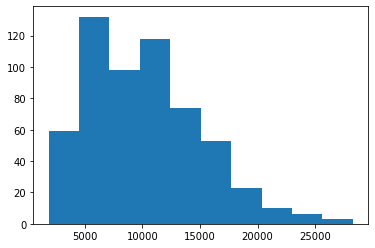

In [25]:
plt.hist(bright_coloc['intensity'])
#plt.yscale('log')
plt.show()

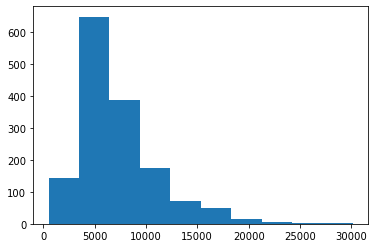

In [26]:
plt.hist(bright_no_coloc['intensity'])
#plt.yscale('log')
plt.show()

In [27]:
bright_coloc

,x,y,z,intensity,,closest_mrna,distance
1,26.193091,3.461991,8.562922,28270.8800,0.0,88.0,0.245849
3,15.144712,12.670957,6.341670,27843.5850,0.0,10.0,0.119276
5,19.087438,9.161069,4.954446,26249.4460,0.0,410.0,0.104749
8,12.602050,5.559165,3.958366,24080.4430,0.0,1522.0,0.399681
9,7.900898,4.892098,7.661719,24033.6520,0.0,316.0,0.346837
...,...,...,...,...,...,...,...
2019,0.798278,10.449007,18.743166,2070.8303,0.0,3067.0,0.378314
2020,16.450619,28.975295,17.950882,2070.4457,0.0,3101.0,0.361540
2026,9.463710,0.097766,12.864529,1980.9745,0.0,2274.0,0.271339
2029,0.078649,8.602028,10.139797,1956.7571,0.0,2835.0,0.293806


In [28]:
non_coloc['intensity'].median()

1134.4638

In [29]:
just_singles['intensity'].median()

953.68538

In [30]:
single_int = just_singles['intensity'].median()

In [31]:
correction_factor = (575*0.5 + 759)/(575 + 759)

In [32]:
correction_factor

0.7844827586206896

In [33]:
ribosome_number = (bright_coloc['intensity']/single_int)/correction_factor

In [34]:
ribosome_number = pd.DataFrame(ribosome_number).rename(columns = {'intensity':'ribo_num'})

In [35]:
ribosome_number.to_csv(folder + '/ribo_num.csv')

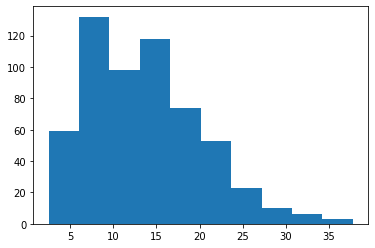

In [36]:
plt.hist(ribosome_number)
plt.show()